In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
from astropy.table import Table
from scipy.optimize import curve_fit

from dotenv import load_dotenv
load_dotenv(override=True)

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)
from src.utils.constants import *
from src.utils.functions import *
from src.utils.CosmoFunc import *

df_combined = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df_combined = pd.concat([df_combined, df_temp], axis=0).reset_index(drop=True)

# Logdist trend vs richness
## SDSS

(0.9, 262.03292228993917)

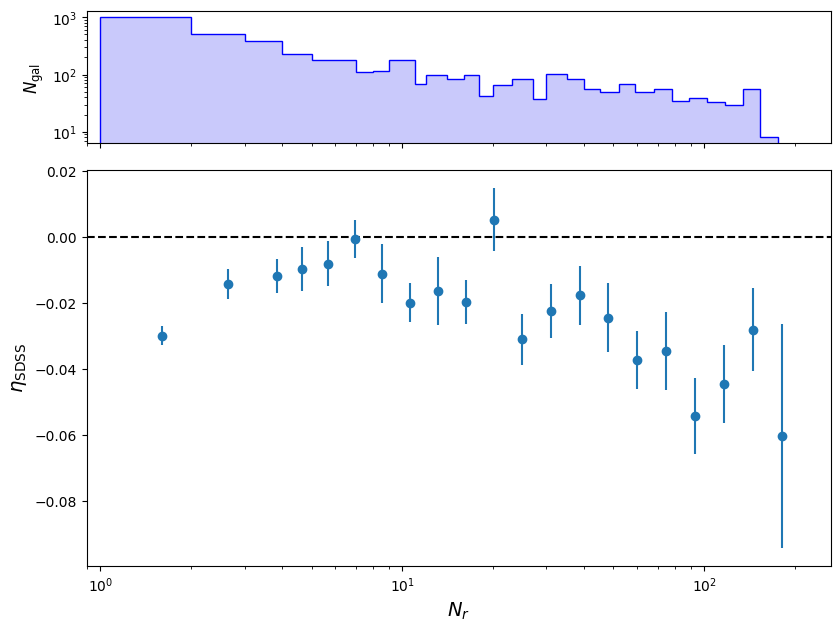

In [70]:
survey = "SDSS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

# 6dFGS

(0.9, 262.03292228993917)

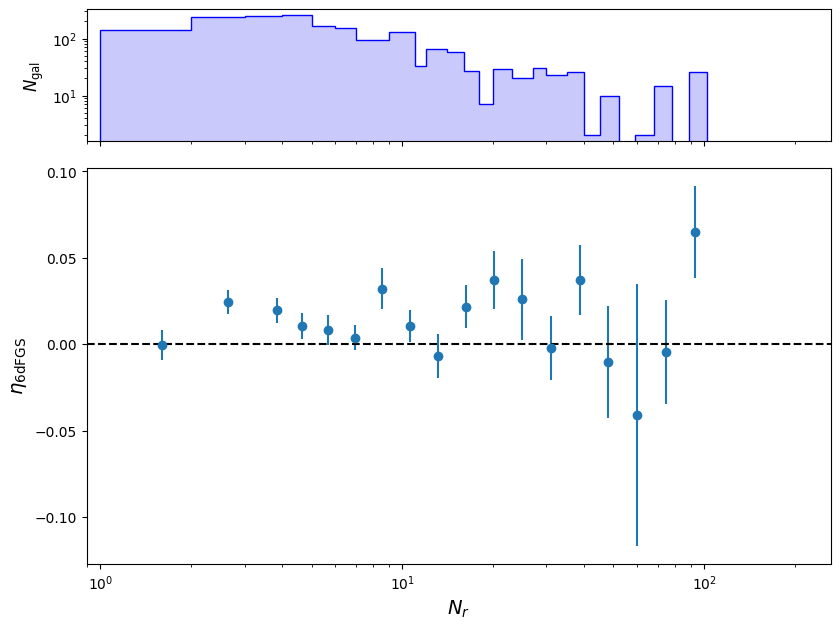

In [71]:
survey = "6dFGS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

# LAMOST

(0.9, 262.03292228993917)

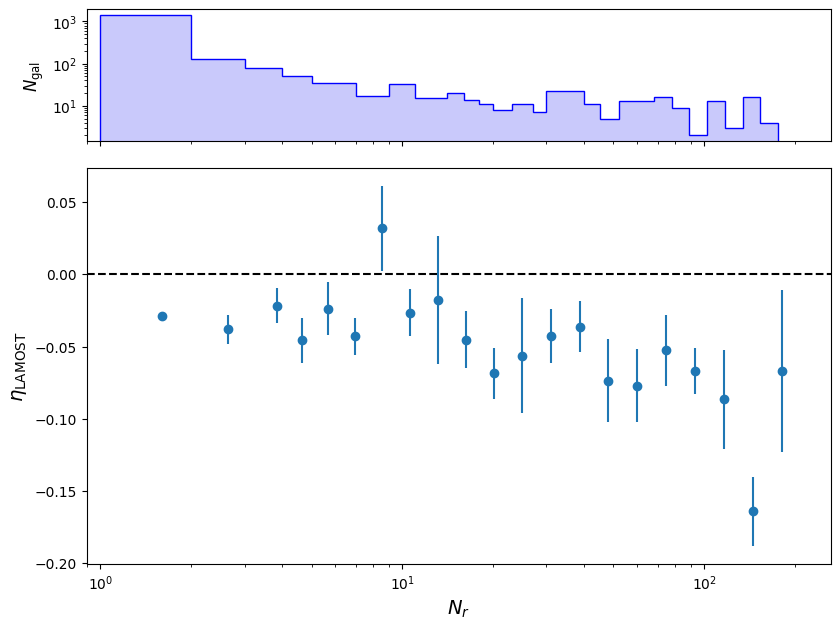

In [72]:
survey = "LAMOST"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle + 0.5, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

# After fitting each richness bin

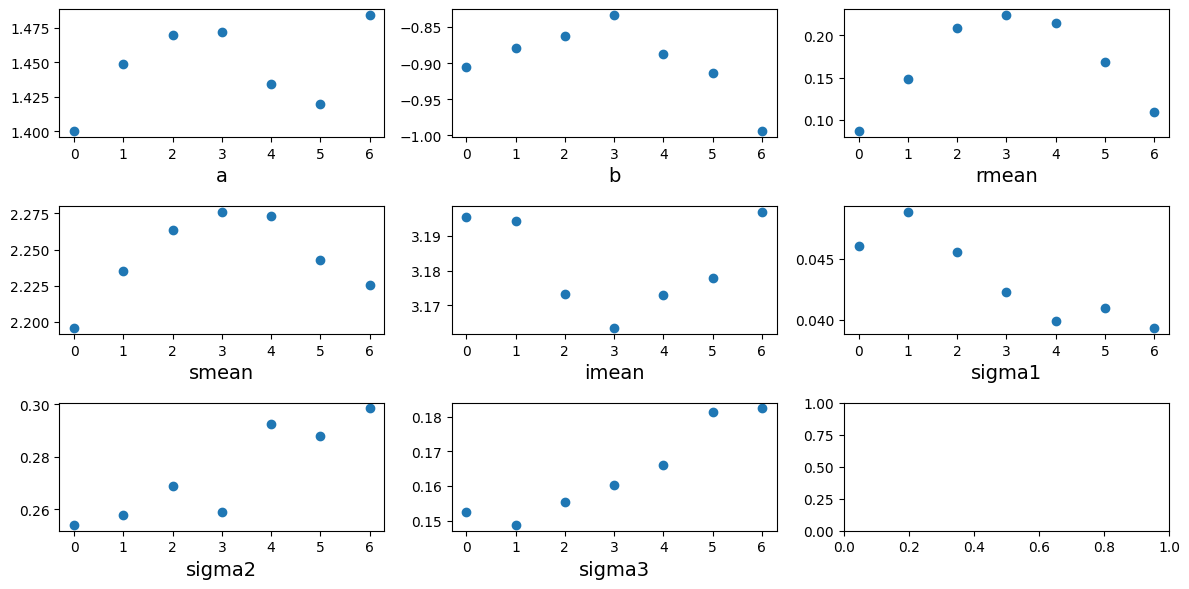

In [28]:
fp_fit = pd.read_csv("../../experiments/experiment_007_richness_analysis/sdss_fp_fit.csv")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8 * 1.5, 6))
for i, col in enumerate(fp_fit.columns[:8]):
    ax = fig.axes[i]
    ax.scatter(fp_fit["richness_bin"], fp_fit[col])
    ax.set_xlabel(col, fontsize=14)

fig.tight_layout()

(0.9, 307.4805415805105)

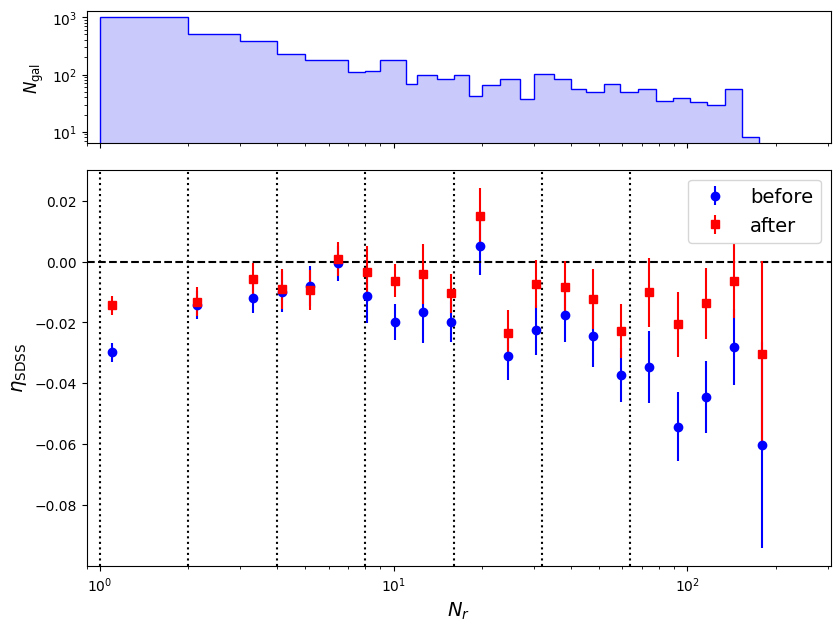

In [17]:
survey = "SDSS"
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', c='b', label="before")
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

#######################
df = pd.read_csv("./sdss_final.csv")

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_sdss"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='s', c='r', label="after")
ax2.legend(fontsize=14)

richness_bin_vert = df["richness_lower_limit"].unique().tolist()
for _ in richness_bin_vert:
    ax2.axvline(x=_, c='k', ls=":")

ax2.set_xlim(left=0.9)

Text(0, 0.5, '$eta$ after (richness-based FP)')

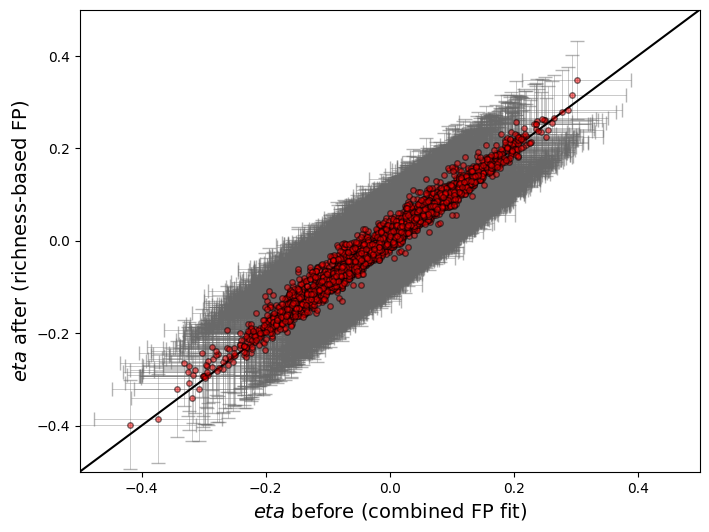

In [36]:
# Combined FP fit logdists
df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
df1 = df1[["tmass", "logdist_all_combined", "logdist_err_all_combined"]]

# Richness-based FP fit logdists
df2 = pd.read_csv("../../experiments/experiment_007_richness_analysis/sdss_final.csv")
df2 = df2[["tmass", "logdist_sdss", "logdist_err_sdss"]]

# Merge
df = df1.merge(df2, on="tmass")

fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(df["logdist_all_combined"], df["logdist_sdss"], xerr=df["logdist_err_all_combined"], yerr=df["logdist_err_sdss"], fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.5)
ax.plot([-0.5, 0.5], [-0.5, 0.5], c='k')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel(r"$eta$ before (combined FP fit)", fontsize=14)
ax.set_ylabel(r"$eta$ after (richness-based FP)", fontsize=14)

In [30]:
df1

,tmass,logdist_all_combined,logdist_err_all_combined
0,2MASXJ09545075+5235243,0.159442,0.090238
1,2MASXJ11134133+0745459,-0.032448,0.094230
2,2MASXJ08100249+2251416,0.035811,0.094419
3,2MASXJ15330725+0445203,-0.011395,0.096363
4,2MASXJ12591227+3554350,-0.017591,0.091567
...,...,...,...
4428,2MASXJ16330166+2247500,0.056179,0.091647
4429,2MASXJ11474317+3256514,-0.055044,0.096444
4430,2MASXJ13142059+1233094,-0.231180,0.100871
4431,2MASXJ12030810+1109211,0.047388,0.097497


# Richness vs Absolute Magnitude

## Step 1: Derive liear fit of log-distance ratio vs absolute magnitude for SDSS

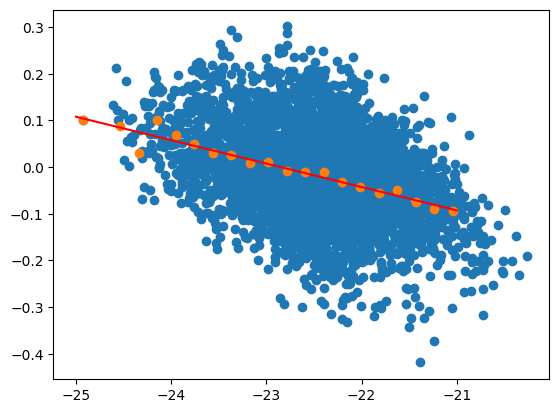

In [2]:
# Linear function
def linear_func(x, m, c):
    return m * x + c

# Load log-distance ratio
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv')

# Calculate J-band absolute magnitude
red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
d_L = (1 + df["zhelio"]) * d_C * 10**6
df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]

# Calculate absolute magnitude rolling mean
x_param = "absMag_j"
window_size = 0.1
x_pts = np.linspace(df[x_param].min(), df[x_param].max(), 25)

x_trials = []
logdist_means = []
logdist_stds = []
logdist_stderrs = []
for x in x_pts:
    x_lower = x - window_size / 2
    x_upper = x + window_size / 2
    _ = df[(df[x_param] >= x_lower) & (df[x_param] <= x_upper)]
    if not len(_):
        continue

    logdist_mean = _["logdist_all_combined"].mean()
    logdist_std = _["logdist_all_combined"].std()
    logdist_stderr = _["logdist_all_combined"].std() / np.sqrt(len(_))
    
    x_trials.append(x)
    logdist_means.append(logdist_mean)
    logdist_stds.append(logdist_std)
    logdist_stderrs.append(logdist_stderr)

x_trials = np.array(x_trials)
logdist_means = np.array(logdist_means)
logdist_stds = np.array(logdist_stds)
logdist_stderrs = np.array(logdist_stderrs)

logdist_means = logdist_means[x_trials < -21]
logdist_stds = logdist_stds[x_trials < -21]
x_trials = x_trials[x_trials < -21]

plt.scatter(df["absMag_j"], df["logdist_all_combined"])
plt.scatter(x_trials, logdist_means)

# Fit linear relationship
popt, pcov = curve_fit(linear_func, x_trials, logdist_means, p0=[-0.1, -10])
# popt, pcov = curve_fit(linear_func, df['absMag_j'].to_numpy(), df['logdist_all_combined'].to_numpy(), p0=[-0.1, -10])

x_ = np.linspace(-25, -21, 100)
y_ = linear_func(x_, popt[0], popt[1])
plt.plot(x_, y_, c='r')

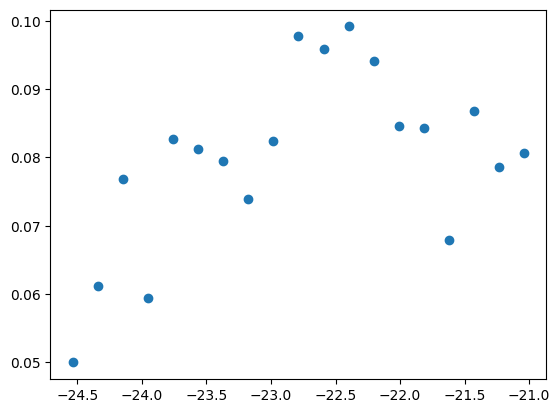

In [3]:
plt.scatter(x_trials, logdist_stds)

## Step 2: Calculate median absolute magnitude for each richness bin + logdist prediction

In [4]:
# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

# Median richness in each bin
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
absmag_binned_median = df[['richness_bin', "absMag_j"]].groupby(by='richness_bin', observed=False).median().values.ravel()

# Predicttion from linear relation
logdist_pred = linear_func(absmag_binned_median, popt[0], popt[1])
logdist_pred_err = 0.08

## Step 3: Plot actual vs prediction

(0.9, 262.03292228993917)

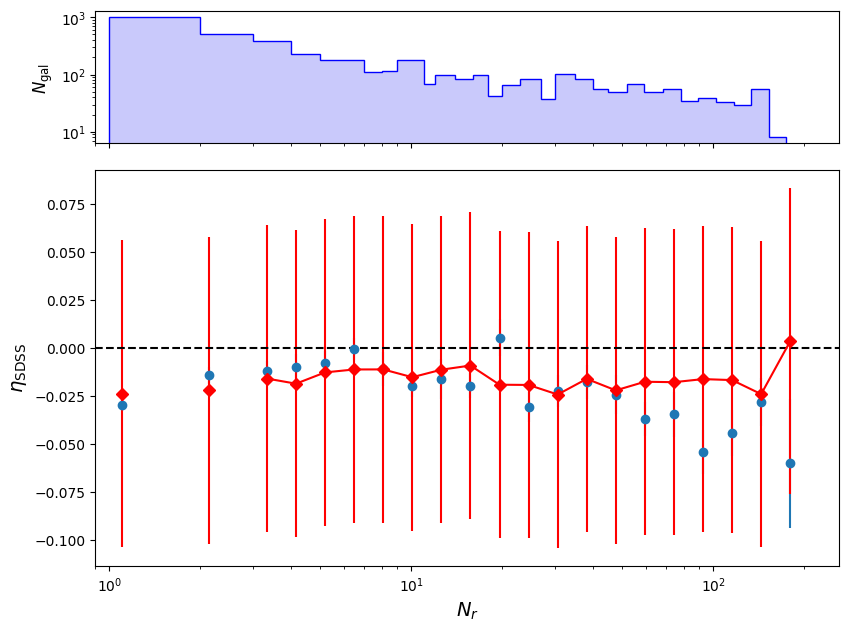

In [9]:
survey = "SDSS"
# df = df[df["Group"] != -1]

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())
logdist_lower = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.16).to_numpy().ravel()
logdist_upper = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).quantile(0.84).to_numpy().ravel()

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o')
# ax2.scatter(richness_bins_middle, logdist_pred, c='r', marker='D')
ax2.errorbar(richness_bins_middle, logdist_pred, yerr=logdist_pred_err, c='r', marker='D')
ax2.set_xscale("log")
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)
ax2.set_xlabel("$N_r$", fontsize=14)

ax2.set_xlim(left=0.9)

## Step 4: Sanity check

In [62]:
# Richest cluster
df_ = df[(df["Nr"] > 160) & (df["Nr"] <= 200)]

# Median absolute magnitude
median_absmag = df_["absMag_j"].median()
print("Median absolute magnitude: ", median_absmag)

# Prediction
pred_logdist = linear_func(median_absmag, popt[0], popt[1])
print("Predicted log-distance ratio: ", pred_logdist)

# Actual
mean_logdist = df_["logdist_all_combined"].mean()
median_logdist = df_["logdist_all_combined"].median()
print("Mean logdist: ", mean_logdist)
print("Median logdist: ", median_logdist)

Median absolute magnitude:  -22.920744592708985
Predicted log-distance ratio:  0.0035194569535554887
Mean logdist:  -0.05944414977830316
Median logdist:  -0.0602628121846282


# Predict log-distance ratio from individual absolute magnitude

(0.9, 262.03292228993917)

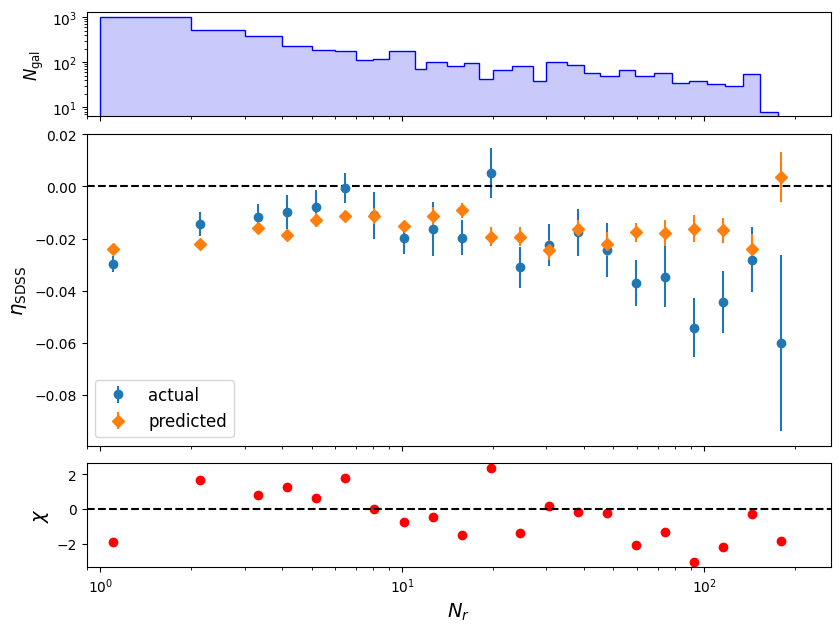

In [32]:
# Load log-distance ratio
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv')

# Calculate J-band absolute magnitude
red_spline, lumred_spline, dist_spline, lumdist_spline, ez_spline = rz_table()
d_C = sp.interpolate.splev(df["z_dist_est"].to_numpy(), dist_spline)
d_L = (1 + df["zhelio"]) * d_C * 10**6
df["absMag_j"] = (df["j_m_ext"] - df["extinction_j"]) - 5 * (np.log10(d_L) - 1) - df["kcor_j"]

# Predict log-distance ratio from the trend
df['logdist_pred'] = linear_func(df['absMag_j'].to_numpy(), *popt)

# Create the bins
survey = "SDSS"

# Richness bins
richness_bins = np.logspace(-0.01, np.log10(200), 25)
richness_bins_labels = range(1, len(richness_bins))

scale = 1.2
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8 * scale, 6 * scale), height_ratios=[1, 3, 1], sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)

# Histogram of group richness
histogram_bins = np.unique(np.ceil(np.logspace(0., np.log10(200), 40)))
ax1.hist(df["Nr"], bins=histogram_bins, edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
# ax1.hist(df["Nr"], bins=np.unique(np.ceil(np.linspace(1, 210, 40))), edgecolor='blue', histtype='stepfilled', color='#c9c9fb')
ax1.set_yscale("log")
ax1.set_ylabel("$N_\mathrm{gal}$", fontsize=12)

# Trend of logdist vs richness
df['richness_bin'] = pd.cut(df['Nr'], richness_bins, labels=richness_bins_labels)
richness_bins_middle = 0.5 * (richness_bins[1:] + richness_bins[:-1])
logdist_binned_mean = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_binned_std = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()
logdist_binned_stderr = df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel() / np.sqrt(df[['richness_bin', "logdist_all_combined"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

# Predicted logdist from logdist vs absolute magnitude relation
err_absmag_relation = 0.0
logdist_pred_binned_mean = df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).median().values.ravel()
logdist_pred_binned_stderr = np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).std().to_numpy().ravel()**2 + err_absmag_relation**2) / np.sqrt(df[['richness_bin', "logdist_pred"]].groupby(by='richness_bin', observed=False).count().to_numpy().ravel())

ax2.errorbar(richness_bins_middle, logdist_binned_mean, yerr=logdist_binned_stderr, fmt='o', label='actual')
ax2.errorbar(richness_bins_middle, logdist_pred_binned_mean, yerr=logdist_pred_binned_stderr, fmt='D', label='predicted')

ax2.legend(loc="lower left", fontsize=12)
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel(r"$\eta_\mathrm{survey}$".replace("survey", survey), fontsize=14)

# Calculate statistical significance
chisq = (logdist_binned_mean - logdist_pred_binned_mean) / np.sqrt(logdist_binned_stderr**2 + logdist_pred_binned_stderr**2)
ax3.scatter(richness_bins_middle, chisq, c='r', marker='o')
ax3.axhline(y=0, c='k', ls='--')

ax3.set_ylabel(r"$\chi$", fontsize=14)
ax3.set_xlabel(r"$N_r$", fontsize=14)
ax3.set_xscale("log")
ax3.set_xlim(left=0.9)